# Effects of Advertising on Sales

The data attributes are 
- TV    - Independent variable quantifying budget for TV ads
- Radio - Independent variable quantifying budget for radio ads 
- News  - Independent variable quantifying budget for news ads
- Sales - Dependent variable

In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
import io
Ad_df = pd.read_csv('Advertising.csv')

Ad_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
Ad_df.drop(columns = 'Unnamed: 0', inplace=True)

In [4]:
Ad_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
Ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### The simple linear regression

In [47]:

Sales = Ad_df.Sales.values.reshape(len(Ad_df['Sales']), 1)
TV = Ad_df.TV.values.reshape(len(Ad_df['Sales']), 1)
Radio = Ad_df.Radio.values.reshape(len(Ad_df['Sales']), 1)
Newspaper = Ad_df.Newspaper.values.reshape(len(Ad_df['Sales']), 1)

In [48]:
# the simple linear regression model with the TV feature
tv_model = linear_model.LinearRegression()
tv_model.fit(TV, Sales)
coeffs_tv = np.array(list(tv_model.intercept_.flatten()) + list(tv_model.coef_.flatten()))
coeffs_tv = list(coeffs_tv)

# the simple linear regression model with the Radio feature
radio_model = linear_model.LinearRegression()
radio_model.fit(Radio, Sales)
coeffs_radio = np.array(list(radio_model.intercept_.flatten()) + list(radio_model.coef_.flatten()))
coeffs_radio = list(coeffs_radio)

# the simple linear regression model with the Radio feature
newspaper_model = linear_model.LinearRegression()
newspaper_model.fit(Newspaper, Sales)
coeffs_newspaper = np.array(list(newspaper_model.intercept_.flatten()) + list(newspaper_model.coef_.flatten()))
coeffs_newspaper = list(coeffs_newspaper)

# results
dict_Sales = {}
dict_Sales["TV"] = coeffs_tv
dict_Sales["Radio"] = coeffs_radio
dict_Sales["Newspaper"] = coeffs_newspaper

metric_Df_SLR =  pd.DataFrame(dict_Sales)
metric_Df_SLR.index = ['Intercept', 'Coefficient']
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693


In [49]:

tv_rsq = tv_model.score(TV, Sales)
radio_rsq = radio_model.score(Radio, Sales)
newspaper_rsq = newspaper_model.score(Newspaper, Sales)

print("TV simple linear regression R-Square :", tv_rsq)
print("Radio simple linear regression R-Square :", radio_rsq)
print("Newspaper simple linear regression R-Square :", newspaper_rsq)
list_rsq = [tv_rsq, radio_rsq, newspaper_rsq]
list_rsq

TV simple linear regression R-Square : 0.611875050850071
Radio simple linear regression R-Square : 0.33203245544529525
Newspaper simple linear regression R-Square : 0.05212044544430516


[0.611875050850071, 0.33203245544529525, 0.05212044544430516]

In [50]:
metric_Df_SLR.loc['R-Squared'] = list_rsq
metric_Df_SLR

,TV,Radio,Newspaper
Intercept,7.032594,9.311638,12.351407
Coefficient,0.047537,0.202496,0.054693
R-Squared,0.611875,0.332032,0.052120


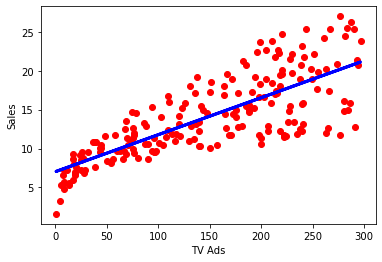

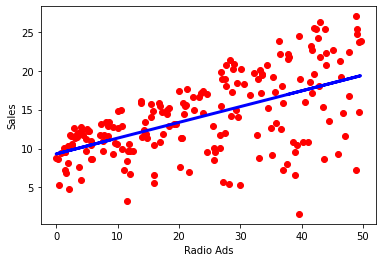

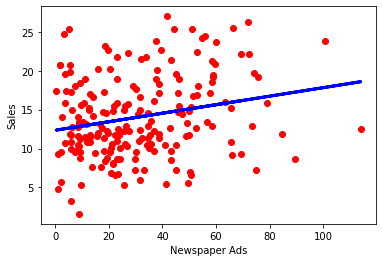

In [51]:
plt.scatter(TV, Sales,  color='red')
plt.xlabel('TV Ads')
plt.ylabel('Sales')
plt.plot(TV, tv_model.predict(TV), color='blue', linewidth=3)
plt.show()

plt.scatter(Radio, Sales,  color='red')
plt.xlabel('Radio Ads')
plt.ylabel('Sales')
plt.plot(Radio, radio_model.predict(Radio), color='blue', linewidth=3)
plt.show()

plt.scatter(Newspaper, Sales,  color='red')
plt.xlabel('Newspaper Ads')
plt.ylabel('Sales')
plt.plot(Newspaper, newspaper_model.predict(Newspaper), color='blue', linewidth=3)
plt.show()


## Multiple Linear Regression



In [52]:
mlr_model = linear_model.LinearRegression()
mlr_model.fit(Ad_df[['TV', 'Radio', 'Newspaper']], Ad_df['Sales'])

LinearRegression()

In [53]:
Ad_df['Sales_Predicted']  = mlr_model.predict(Ad_df[['TV', 'Radio', 'Newspaper']]) 
Ad_df['Error'] = (Ad_df['Sales_Predicted'] - Ad_df['Sales'])**2
MSE_MLR = Ad_df['Error'].mean()

In [54]:
MSE_MLR

2.7841263145109343

In [55]:
mlr_model.score(Ad_df[['TV', 'Radio', 'Newspaper']], Ad_df['Sales'])

0.8972106381789522

In [56]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper', data = Ad_df).fit()
lm1.params
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        10:22:37   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [57]:
print("*************Parameters**************")
print(lm1.params)
print("*************P-Values**************")
print(lm1.pvalues)
print("************Standard Errors***************")
print(lm1.bse) 
print("*************Connfidence Interval**************")
print(lm1.conf_int())
print("*************Error Covariance Matrix**************")
print(lm1.cov_params())


*************Parameters**************
Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64
*************P-Values**************
Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64
************Standard Errors***************
Intercept    0.311908
TV           0.001395
Radio        0.008611
Newspaper    0.005871
dtype: float64
*************Connfidence Interval**************
                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
Radio      0.171547  0.205513
Newspaper -0.012616  0.010541
*************Error Covariance Matrix**************
           Intercept            TV         Radio     Newspaper
Intercept   0.097287 -2.657273e-04 -1.115489e-03 -5.910212e-04
TV         -0.000266  1.945737e-06 -4.470395e-07 -3.265950e-07
Radio      -0.001115 -4.470395e-07  7.415335e-05 -1.780062e-05
Newspaper  -0.000591 -3.265950e-07 -1.780062e-05  3.44687

## Visualising the confidence bands in Simple linear regression

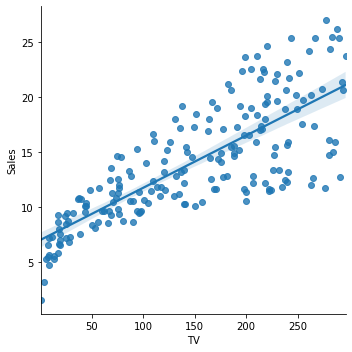

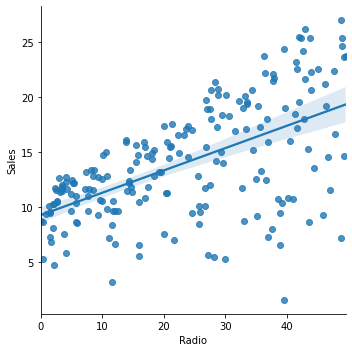

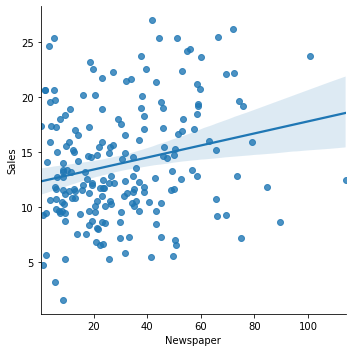

In [58]:
import seaborn as sns
sns.lmplot(x = 'TV', y = 'Sales', data = Ad_df)

sns.lmplot(x = 'Radio', y = 'Sales', data = Ad_df )

sns.lmplot(x = 'Newspaper', y = 'Sales', data = Ad_df)

# LVC  2


In [59]:
Ad_df['TVandRadio'] = Ad_df['TV']*Ad_df['Radio']

In [60]:

Ad_df.drop(columns = ["Error", "Sales_Predicted"], inplace = True)

In [61]:

import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'Sales ~ TV+Radio+Newspaper+TVandRadio', data = Ad_df).fit()
lm2.params
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1466.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):          2.92e-144
Time:                        10:22:54   Log-Likelihood:                -270.04
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     195   BIC:                             566.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7284      0.253     26.561      0.0

## Performance assessment, testing and validation

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
features_base = [i for i in Ad_df.columns if i not in ("Sales" , "TVandRadio")]
features_added = [i for i in Ad_df.columns if i not in "Sales"]
target  = 'Sales'
train, test = train_test_split(Ad_df, test_size = 0.10, train_size = 0.9)

In [64]:
train, validation = train_test_split(train, test_size = 0.2, train_size = 0.80)

In [65]:
train.shape, validation.shape,test.shape

((144, 5), (36, 5), (20, 5))

In [66]:
#the modelling
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(train[features_base], train[target])
print("*********Training set Metrics**************")
print("R-Squared:", mlr.score(train[features_base], train[target]))
se_train = (train[target] - mlr.predict(train[features_base]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", mlr.score(validation[features_base], validation[target]))
se_val = (validation[target] - mlr.predict(validation[features_base]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9164528906437805
MSE:  2.2192645330836154
********Validation set Metrics**************
R-Squared: 0.8343231016526509
MSE:  3.440683481088408


In [67]:


mlr_added_feature = LinearRegression()
mlr_added_feature.fit(train[features_added], train[target])
print("*********Training set Metrics**************")
print("R-Squared:", mlr_added_feature.score(train[features_added], train[target]))
se_train = (train[target] - mlr_added_feature.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", mlr_added_feature.score(validation[features_added], validation[target]))
se_val = (validation[target] - mlr_added_feature.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9763024396622543
MSE:  0.6294790517998099
********Validation set Metrics**************
R-Squared: 0.9497627944018433
MSE:  1.0432976785648866




## Regularization 

In [68]:
features_added

['TV', 'Radio', 'Newspaper', 'TVandRadio']

In [69]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#fitting ridge with the default features
ridge = Ridge()
ridge.fit(train[features_added], train[target])

print("*********Training set Metrics**************")
print("R-Squared:", ridge.score(train[features_added], train[target]))
se_train = (train[target] - ridge.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", ridge.score(validation[features_added], validation[target]))
se_val = (validation[target] - ridge.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9763024395678913
MSE:  0.6294790543063781
********Validation set Metrics**************
R-Squared: 0.9497647419117851
MSE:  1.0432572337874157


In [70]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#fitting lasso with the default features
lasso = Lasso()
lasso.fit(train[features_added], train[target])

print("*********Training set Metrics**************")
print("R-Squared:", lasso.score(train[features_added], train[target]))
se_train = (train[target] - lasso.predict(train[features_added]))**2
mse_train = se_train.mean()
print('MSE: ', mse_train)
print("********Validation set Metrics**************")
print("R-Squared:", lasso.score(validation[features_added], validation[target]))
se_val = (validation[target] - lasso.predict(validation[features_added]))**2
mse_val = se_val.mean()
print('MSE: ', mse_val)

*********Training set Metrics**************
R-Squared: 0.9754666232841175
MSE:  0.6516808689358264
********Validation set Metrics**************
R-Squared: 0.954478737536946
MSE:  0.9453596570026915


In [71]:
#Ridge

rsq_test = ridge.score(test[features_added], test[target])
se_test = (test[target] - ridge.predict(test[features_added]))**2
mse_test = se_test.mean()

print("*****************Test set Metrics******************")

print("Rsquared: ", rsq_test)
print("MSE: ", mse_test)
print("Intercept is {} and Coefficients are {}".format(ridge.intercept_, ridge.coef_))

*****************Test set Metrics******************
Rsquared:  0.9284304359891257
MSE:  2.7138373515328404
Intercept is 6.462053614692852 and Coefficients are [ 0.02081624  0.05098883 -0.00101732  0.00096575]




### K-Fold and LooCV


In [72]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [73]:
ridgeCV = Ridge()
cvs = cross_val_score(ridgeCV, Ad_df[features_added], Ad_df[target], cv = 10)
print("Mean Score:")
print(cvs.mean(), "\n")
print("Confidence Interval:")
cvs.mean() - cvs.std(), cvs.mean() + cvs.std() 


Mean Score:
0.9649887636257691 

Confidence Interval:


(0.9430473456799694, 0.9869301815715689)

## Bootstrapping

In [74]:

import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'Sales ~ TV', data = Ad_df).fit()
lm2.params
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.47e-42
Time:                        10:23:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

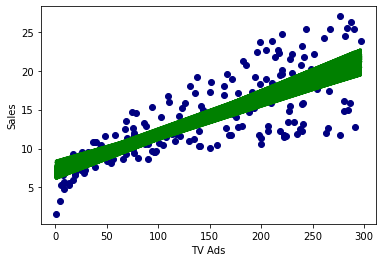

In [75]:


import statsmodels.formula.api as smf


Slope = []
for i in range(1000):
  bootstrap_df = Ad_df.sample(n = 200, replace = True )
  lm3 = smf.ols(formula= 'Sales ~ TV', data = bootstrap_df).fit()
  Slope.append(lm3.params.TV)
  
  plt.xlabel('TV Ads')
  plt.ylabel('Sales')
  plt.plot(bootstrap_df['TV'], lm3.predict(bootstrap_df['TV']), color='green', linewidth=3)
  
plt.scatter(Ad_df['TV'], Ad_df['Sales'],  color=(0,0,0.5))
plt.show()


In [76]:

import numpy as np

Slope = np.array(Slope)
Sort_Slope = np.sort(Slope)


Slope_limits = np.percentile(Sort_Slope, (2.5, 97.5))
Slope_limits

array([0.04170177, 0.05330078])

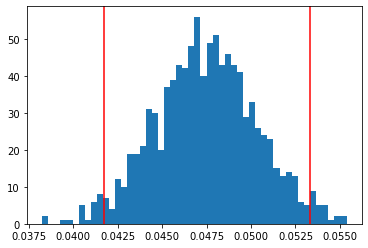

In [77]:


plt.hist(Slope, 50)
plt.axvline(Slope_limits[0], color = 'r')
plt.axvline(Slope_limits[1], color = 'r')